### Plane Frame Member Local Stiffness Matrix
This page develops the various member stiffness relationships needed to analyze a planar frame by the matrix stiffness method.

In [1]:
from salib import showImage

#### Numbering and Sign Convention, Local Coordinates

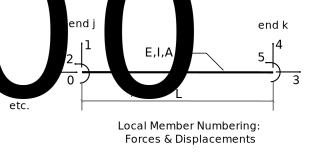

In [2]:
showImage('numbering-and-signs')

The above figure shows the numbering and sign convention used for the six end displacements and forces for a general 2D frame member.  These are shown relative to the local coordinate system of the member, with origin at the left, or *j-end*, and *x*-axis coincident with the axis of the member.  The *y*-axis is positive upwards. It is sometimes necessary to distinguish member ends; the term *j-end* is used to refer to the left end or origin, and *k-end* is the other end (note that the CAL manual uses the *i-* and *j-* end for the same purpose).

Of course $f_0$ and $f_3$ are axial forces, $f_1$ and $f_4$ are shear forces, and $f_2$ and $f_5$ are bending moments.

$\newcommand{\mat}[1]{\left[\begin{matrix}#1\end{matrix}\right]}$
The local member stiffness matrix, $\mat{K_l}$, expresses the end forces as a function of the end displacements, thus:
$$
\mat{f_0\\ f_1\\ f_2\\ f_3\\ f_4\\ f_5} =
\mat{K_l}
\mat{\delta_0\\ \delta_1\\ \delta_2\\ \delta_3\\ \delta_4\\ \delta_5}
$$

### Derivation of the Local Member Stiffness Matrix, $\mat{K_l}$

In [3]:
from sympy import *
init_printing(use_latex='mathjax')
from sympy.matrices import Matrix

#### Moment Flexibility Coefficients

We will first determine the inverse relationship for end moments -- the rotation flexibility matrix, $\mat{F}$, that expresses the end *rotations* as a function of the end *moments*, as shown in the following figure.

$$
\mat{\delta_2\\ \delta_5} = \mat{F} \mat{f_2\\f_5}
$$

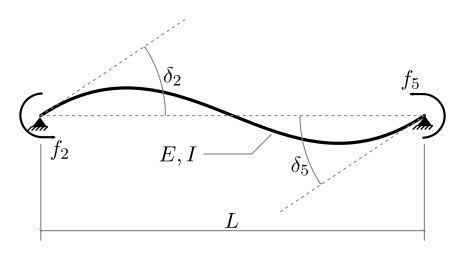

In [4]:
showImage('flexibility')

Note that at each end, there are two other forces acting, $f_0$, $f_1$ and $f_3$, $f_4$; they are omitted from
the drawings just to make the drawings a little simpler.

The method of virtual work is probably the simplest and most direct way to do develop the rotation flexibility matrix.

The following figure shows unit moments placed individually at each end (at location #s 2 and 5).  It also
shows the resulting rotational displacements; these are the coefficients of the flexibility matrix:

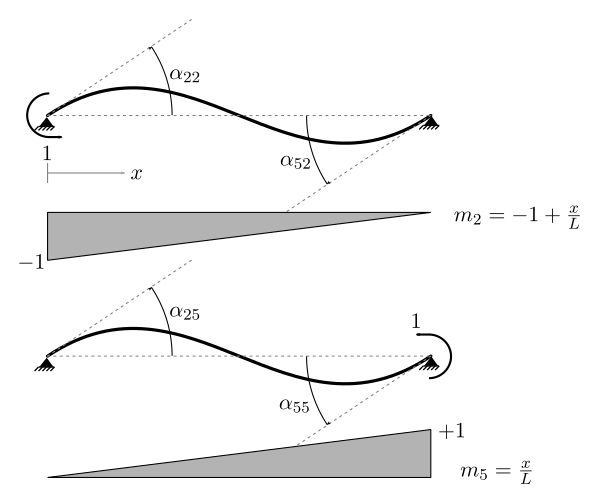

In [5]:
showImage('virtual-work-plain')

$$
\mat{F} = \mat{\alpha_{22} & \alpha_{52}\\ \alpha_{25} & \alpha_{55}}
$$

The coefficients of $\mat{F}$, $\alpha_{ij}$, are the end displacements due to unit values of the end forces.
Specifically $\alpha_{ij}$ is the rotation at $i$ due to a unit moment at $j$:

$$
\mat{F} = \mat{\int_0^L\frac{m_2 m_2}{EI} dx & \int_0^L\frac{m_2 m_5}{EI} dx \\ 
               \int_0^L\frac{m_5 m_2}{EI} dx & \int_0^L\frac{m_5 m_5}{EI} dx }
$$

In [6]:
L,E,I,A,x = symbols('L E I A x')

m2 = x/L - 1     # unit moment at DOF 2
m5 = x/L         # unit moment at DOF 5
EI = E*I
F = Matrix([[m2*m2, m2*m5],
            [m5*m2, m5*m5]]).integrate((x,0,L))/EI
F

⎡  L     -L  ⎤
⎢─────  ─────⎥
⎢3⋅E⋅I  6⋅E⋅I⎥
⎢            ⎥
⎢ -L      L  ⎥
⎢─────  ─────⎥
⎣6⋅E⋅I  3⋅E⋅I⎦

#### Moment Stiffness Coefficients
The moment stiffness matrix, $\mat{M}$ expresses the two end moments as functions
of the end rotations.

$$
\mat{f_2\\f_5} = \mat{M} \mat{\delta_2 \\ \delta_5}
$$

$$
\mat{M} = \mat{F}^{-1}
$$

and that is just the inverse of the *2x2* rotation flexibility matrix.

In [7]:
M = F**-1
M

⎡4⋅E⋅I  2⋅E⋅I⎤
⎢─────  ─────⎥
⎢  L      L  ⎥
⎢            ⎥
⎢2⋅E⋅I  4⋅E⋅I⎥
⎢─────  ─────⎥
⎣  L      L  ⎦

#### Total End Forces
The matrix $\mat{T_f}$ gives the total set of end forces in terms of the two end moments (i.e., that are in equilibrium with the end moments):

$$
\mat{f_0\\ f_1\\ f_2\\ f_3\\ f_4\\ f_5} = \mat{T_f} \mat{f_2\\f_5}
$$

In [8]:
# transform end moments to end thrust,shear,moment
Tf = Matrix([[0,0],[1/L,1/L],[1,0],[0,0],[-1/L,-1/L],[0,1]])
Tf

⎡ 0    0 ⎤
⎢        ⎥
⎢ 1    1 ⎥
⎢ ─    ─ ⎥
⎢ L    L ⎥
⎢        ⎥
⎢ 1    0 ⎥
⎢        ⎥
⎢ 0    0 ⎥
⎢        ⎥
⎢-1   -1 ⎥
⎢───  ───⎥
⎢ L    L ⎥
⎢        ⎥
⎣ 0    1 ⎦

In [9]:
f2,f5 = symbols('f2 f5')  # confirm that that is OK
Tf*Matrix([[f2],
           [f5]])

⎡    0    ⎤
⎢         ⎥
⎢ f₂   f₅ ⎥
⎢ ── + ── ⎥
⎢ L    L  ⎥
⎢         ⎥
⎢   f₂    ⎥
⎢         ⎥
⎢    0    ⎥
⎢         ⎥
⎢  f₂   f₅⎥
⎢- ── - ──⎥
⎢  L    L ⎥
⎢         ⎥
⎣   f₅    ⎦

#### Total Stiffness Coefficients
Column $j$ of the member stiffness matrix $\mat{K_l}$ consists of all six end forces that
are consistent with a unit value of displacement $j$ and zero values of the other five displacements.

Therefore column 2 consists of the six end forces that occur when $\delta_2 = 1$
and all other displacements are 0.  That can be computed:

$$
\mat{T_f} \mat{M} \mat{1\\0}
$$


In [10]:
Kl = zeros(6,6)   # build the member stiffness matrix one column at a time

Kl[:,2] = Tf * M * Matrix([[1],[0]])  # column 2
Kl[:,2]

⎡   0   ⎤
⎢       ⎥
⎢ 6⋅E⋅I ⎥
⎢ ───── ⎥
⎢    2  ⎥
⎢   L   ⎥
⎢       ⎥
⎢ 4⋅E⋅I ⎥
⎢ ───── ⎥
⎢   L   ⎥
⎢       ⎥
⎢   0   ⎥
⎢       ⎥
⎢-6⋅E⋅I ⎥
⎢───────⎥
⎢    2  ⎥
⎢   L   ⎥
⎢       ⎥
⎢ 2⋅E⋅I ⎥
⎢ ───── ⎥
⎣   L   ⎦

Column 5 is similar, but with $\delta_5 = 1$.

In [11]:
Kl[:,5] =  Tf * M * Matrix([[0],[1]])   # column 5
Kl[:,5]

⎡   0   ⎤
⎢       ⎥
⎢ 6⋅E⋅I ⎥
⎢ ───── ⎥
⎢    2  ⎥
⎢   L   ⎥
⎢       ⎥
⎢ 2⋅E⋅I ⎥
⎢ ───── ⎥
⎢   L   ⎥
⎢       ⎥
⎢   0   ⎥
⎢       ⎥
⎢-6⋅E⋅I ⎥
⎢───────⎥
⎢    2  ⎥
⎢   L   ⎥
⎢       ⎥
⎢ 4⋅E⋅I ⎥
⎢ ───── ⎥
⎣   L   ⎦

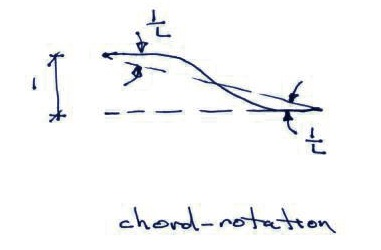

In [12]:
showImage('chord-rotation')

The forces due to end translations are determined by considering the unit translation as
a rotation of the chord.  That is, for the case of $\delta_1 = 1$, (and notabley 
$\delta_2 = \delta_5 = 0$, then the end moments will be consistent with end rotations
of $1/L$.  Column 1 will be calculated:

$$ \mat{T_f} \mat{M} \mat{1/L\\1/L} $$

In [13]:
Kl[:,1] =  Tf * M * Matrix([[1/L],[1/L]])   # column 1
Kl[:,1]

⎡   0    ⎤
⎢        ⎥
⎢ 12⋅E⋅I ⎥
⎢ ────── ⎥
⎢    3   ⎥
⎢   L    ⎥
⎢        ⎥
⎢ 6⋅E⋅I  ⎥
⎢ ─────  ⎥
⎢    2   ⎥
⎢   L    ⎥
⎢        ⎥
⎢   0    ⎥
⎢        ⎥
⎢-12⋅E⋅I ⎥
⎢────────⎥
⎢    3   ⎥
⎢   L    ⎥
⎢        ⎥
⎢ 6⋅E⋅I  ⎥
⎢ ─────  ⎥
⎢    2   ⎥
⎣   L    ⎦

The end forces due to a unit value of $\delta_4$ are the same as those for $\delta_1$, but with reversed signs.

In [14]:
Kl[:,4] =  Tf * M * Matrix([[-1/L],[-1/L]])   # column 4
Kl[:,4]

⎡   0    ⎤
⎢        ⎥
⎢-12⋅E⋅I ⎥
⎢────────⎥
⎢    3   ⎥
⎢   L    ⎥
⎢        ⎥
⎢-6⋅E⋅I  ⎥
⎢─────── ⎥
⎢    2   ⎥
⎢   L    ⎥
⎢        ⎥
⎢   0    ⎥
⎢        ⎥
⎢ 12⋅E⋅I ⎥
⎢ ────── ⎥
⎢    3   ⎥
⎢   L    ⎥
⎢        ⎥
⎢-6⋅E⋅I  ⎥
⎢─────── ⎥
⎢    2   ⎥
⎣   L    ⎦

Now the axial forces and displacements, which are de-coupled from shears and moments:

In [15]:
ac = Matrix([E*A/L,0,0,-E*A/L,0,0])
ac

⎡ A⋅E ⎤
⎢ ─── ⎥
⎢  L  ⎥
⎢     ⎥
⎢  0  ⎥
⎢     ⎥
⎢  0  ⎥
⎢     ⎥
⎢-A⋅E ⎥
⎢─────⎥
⎢  L  ⎥
⎢     ⎥
⎢  0  ⎥
⎢     ⎥
⎣  0  ⎦

In [16]:
Kl[:,0] = ac     # column 0
Kl[:,3] = -ac    # column 3

### The member stiffness matrix in local coordinates, $\mat{K_l}$, is:

In [19]:
Kl

⎡ A⋅E                      -A⋅E                    ⎤
⎢ ───      0         0     ─────     0         0   ⎥
⎢  L                         L                     ⎥
⎢                                                  ⎥
⎢        12⋅E⋅I    6⋅E⋅I          -12⋅E⋅I    6⋅E⋅I ⎥
⎢  0     ──────    ─────     0    ────────   ───── ⎥
⎢           3         2               3         2  ⎥
⎢          L         L               L         L   ⎥
⎢                                                  ⎥
⎢        6⋅E⋅I     4⋅E⋅I          -6⋅E⋅I     2⋅E⋅I ⎥
⎢  0     ─────     ─────     0    ───────    ───── ⎥
⎢           2        L                2        L   ⎥
⎢          L                         L             ⎥
⎢                                                  ⎥
⎢-A⋅E                       A⋅E                    ⎥
⎢─────     0         0      ───      0         0   ⎥
⎢  L                         L                     ⎥
⎢                                                  ⎥
⎢       -12⋅E⋅I   -6⋅E⋅I           12⋅E⋅I   -6

And, for ease of copying into other software, here it is again.

In [18]:
print(Kl)

Matrix([[A*E/L, 0, 0, -A*E/L, 0, 0], [0, 12*E*I/L**3, 6*E*I/L**2, 0, -12*E*I/L**3, 6*E*I/L**2], [0, 6*E*I/L**2, 4*E*I/L, 0, -6*E*I/L**2, 2*E*I/L], [-A*E/L, 0, 0, A*E/L, 0, 0], [0, -12*E*I/L**3, -6*E*I/L**2, 0, 12*E*I/L**3, -6*E*I/L**2], [0, 6*E*I/L**2, 2*E*I/L, 0, -6*E*I/L**2, 4*E*I/L]])
